In [2]:
import glob
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [5]:
paths = glob.glob("experiments/20211012*/log.pkl")
[p.split("/")[1] for p in paths]

['20211012083316_foobar',
 '20211012090735_foobar',
 '20211012114427_lightpyramid_baseline',
 '20211012121955_distinctive_night',
 '20211012123804_distinctive_night_repeat',
 '20211012125129_ppo_silverybird_scale05',
 '20211012130116_triplet_forcedfd_visonaryblaze',
 '20211012131057_triplet_fixed_visionaryblaze',
 '20211012133500_ppo_scale01',
 '20211012134141_correlated',
 '20211012135036_bokit',
 '20211012140255_bokit_fixed',
 '20211012141913_bokit_fixed_hopeforbettersample',
 '20211012145606_lightpyramid_nowhopefullynoevent',
 '20211012153750_lightpyramid_baseline_right',
 '20211012154606_SAC_right',
 '20211012155543_scale05_right',
 '20211012160440_triplet_right',
 '20211012161735_ppo_scale01_right',
 '20211012162527_correlated_right',
 '20211012164536_light_diff_init_act',
 '20211012170855_light_diff_init_act_sac']

## Ranking

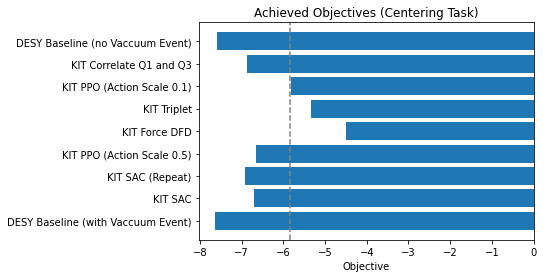

In [59]:
agents = paths[2:10] + paths[13:14]
names = [p.split("/")[1] for p in agents]
initials, objectives = [], []
for agent in agents:
    with open(agent, "rb") as f:
        data = pickle.load(f)
        initials.append(data["history"][0]["objective"])
        objectives.append(data["history"][-1]["objective"])

names[0] = "DESY Baseline (with Vaccuum Event)"
names[1] = "KIT SAC"
names[2] = "KIT SAC (Repeat)"
names[3] = "KIT PPO (Action Scale 0.5)"
names[4] = "KIT Force DFD"
names[5] = "KIT Triplet"
names[6] = "KIT PPO (Action Scale 0.1)"
names[7] = "KIT Correlate Q1 and Q3"
names[8] = "DESY Baseline (no Vaccuum Event)"

plt.title("Achieved Objectives (Centering Task)")
plt.axvline(np.mean(initials), color="grey", ls="--")
plt.barh(names, objectives)
plt.xlabel("Objective")
plt.show()

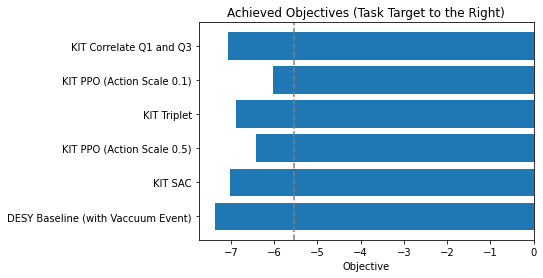

In [60]:
agents = paths[14:20]
names = [p.split("/")[1] for p in agents]
initials, objectives = [], []
for agent in agents:
    with open(agent, "rb") as f:
        data = pickle.load(f)
        initials.append(data["history"][0]["objective"])
        objectives.append(data["history"][-1]["objective"])

names[0] = "DESY Baseline (with Vaccuum Event)"
names[1] = "KIT SAC"
names[2] = "KIT PPO (Action Scale 0.5)"
names[3] = "KIT Triplet"
names[4] = "KIT PPO (Action Scale 0.1)"
names[5] = "KIT Correlate Q1 and Q3"

plt.title("Achieved Objectives (Task Target to the Right)")
plt.axvline(np.mean(initials), color="grey", ls="--")
plt.barh(names, objectives)
plt.xlabel("Objective")
plt.show()

## Paths Taken Towards Center

In [43]:
def plot_objective(objective):
    plt.title("Objective")
    plt.plot(objective)
    plt.xlabel("Step")
    plt.ylabel("Objective")
    plt.grid()

def plot_beam_parameters(achieveds, desireds):
    plt.title("Beam Parameters")
    plt.plot(achieveds[:,0] * 1e3, label="mu_x", c="red")
    plt.plot(achieveds[:,1] * 1e3, label="mu_y", c="green")
    plt.plot(achieveds[:,2] * 1e3, label="sigma_x", c="blue")
    plt.plot(achieveds[:,3] * 1e3, label="sigma_y", c="orange")
    plt.plot(desireds[:,0] * 1e3, label="mu_x'", ls="--", c="red")
    plt.plot(desireds[:,1] * 1e3, label="mu_y'", ls="--", c="green")
    plt.plot(desireds[:,2] * 1e3, label="sigma_x'", ls="--", c="blue")
    plt.plot(desireds[:,3] * 1e3, label="sigma_y'", ls="--", c="orange")
    plt.xlabel("Step")
    plt.ylabel("Paramter Value (mm)")
    plt.grid()
    plt.legend()

def plot_trajectory(achieveds, desireds, pixel_size, screen_resolution):
    plt.title("mu Trajectory")
    plt.plot(achieveds[:,0] * 1e3, achieveds[:,1] * 1e3, marker="X", c="green", label="achieved mu")
    plt.plot(desireds[0,0] * 1e3, desireds[0,1] * 1e3, marker=r"$\heartsuit$", c="red", markersize=12, label="desired mu")
    plt.xlim(-pixel_size[0] * screen_resolution[0] / 2 * 1e3, pixel_size[0] * screen_resolution[0] / 2 * 1e3)
    plt.ylim(-pixel_size[1] * screen_resolution[1] / 2 * 1e3, pixel_size[1] * screen_resolution[1] / 2 * 1e3)
    plt.xlabel("x (mm)")
    plt.ylabel("y (mm)")
    plt.grid()
    plt.legend()

def plot_quadrupoles(actuators):
    plt.plot(actuators[:,0], label="Q1")
    plt.plot(actuators[:,1], label="Q2")
    plt.plot(actuators[:,2], label="Q3")
    plt.xlabel("Step")
    plt.ylabel("Strength (1/m^2)")
    plt.grid()
    plt.legend()

def plot_steerers(actuators):
    plt.plot(actuators[:,3], label="CV")
    plt.plot(actuators[:,4], label="CH")
    plt.xlabel("Step")
    plt.ylabel("Kick (rad)")
    plt.grid()
    plt.legend()

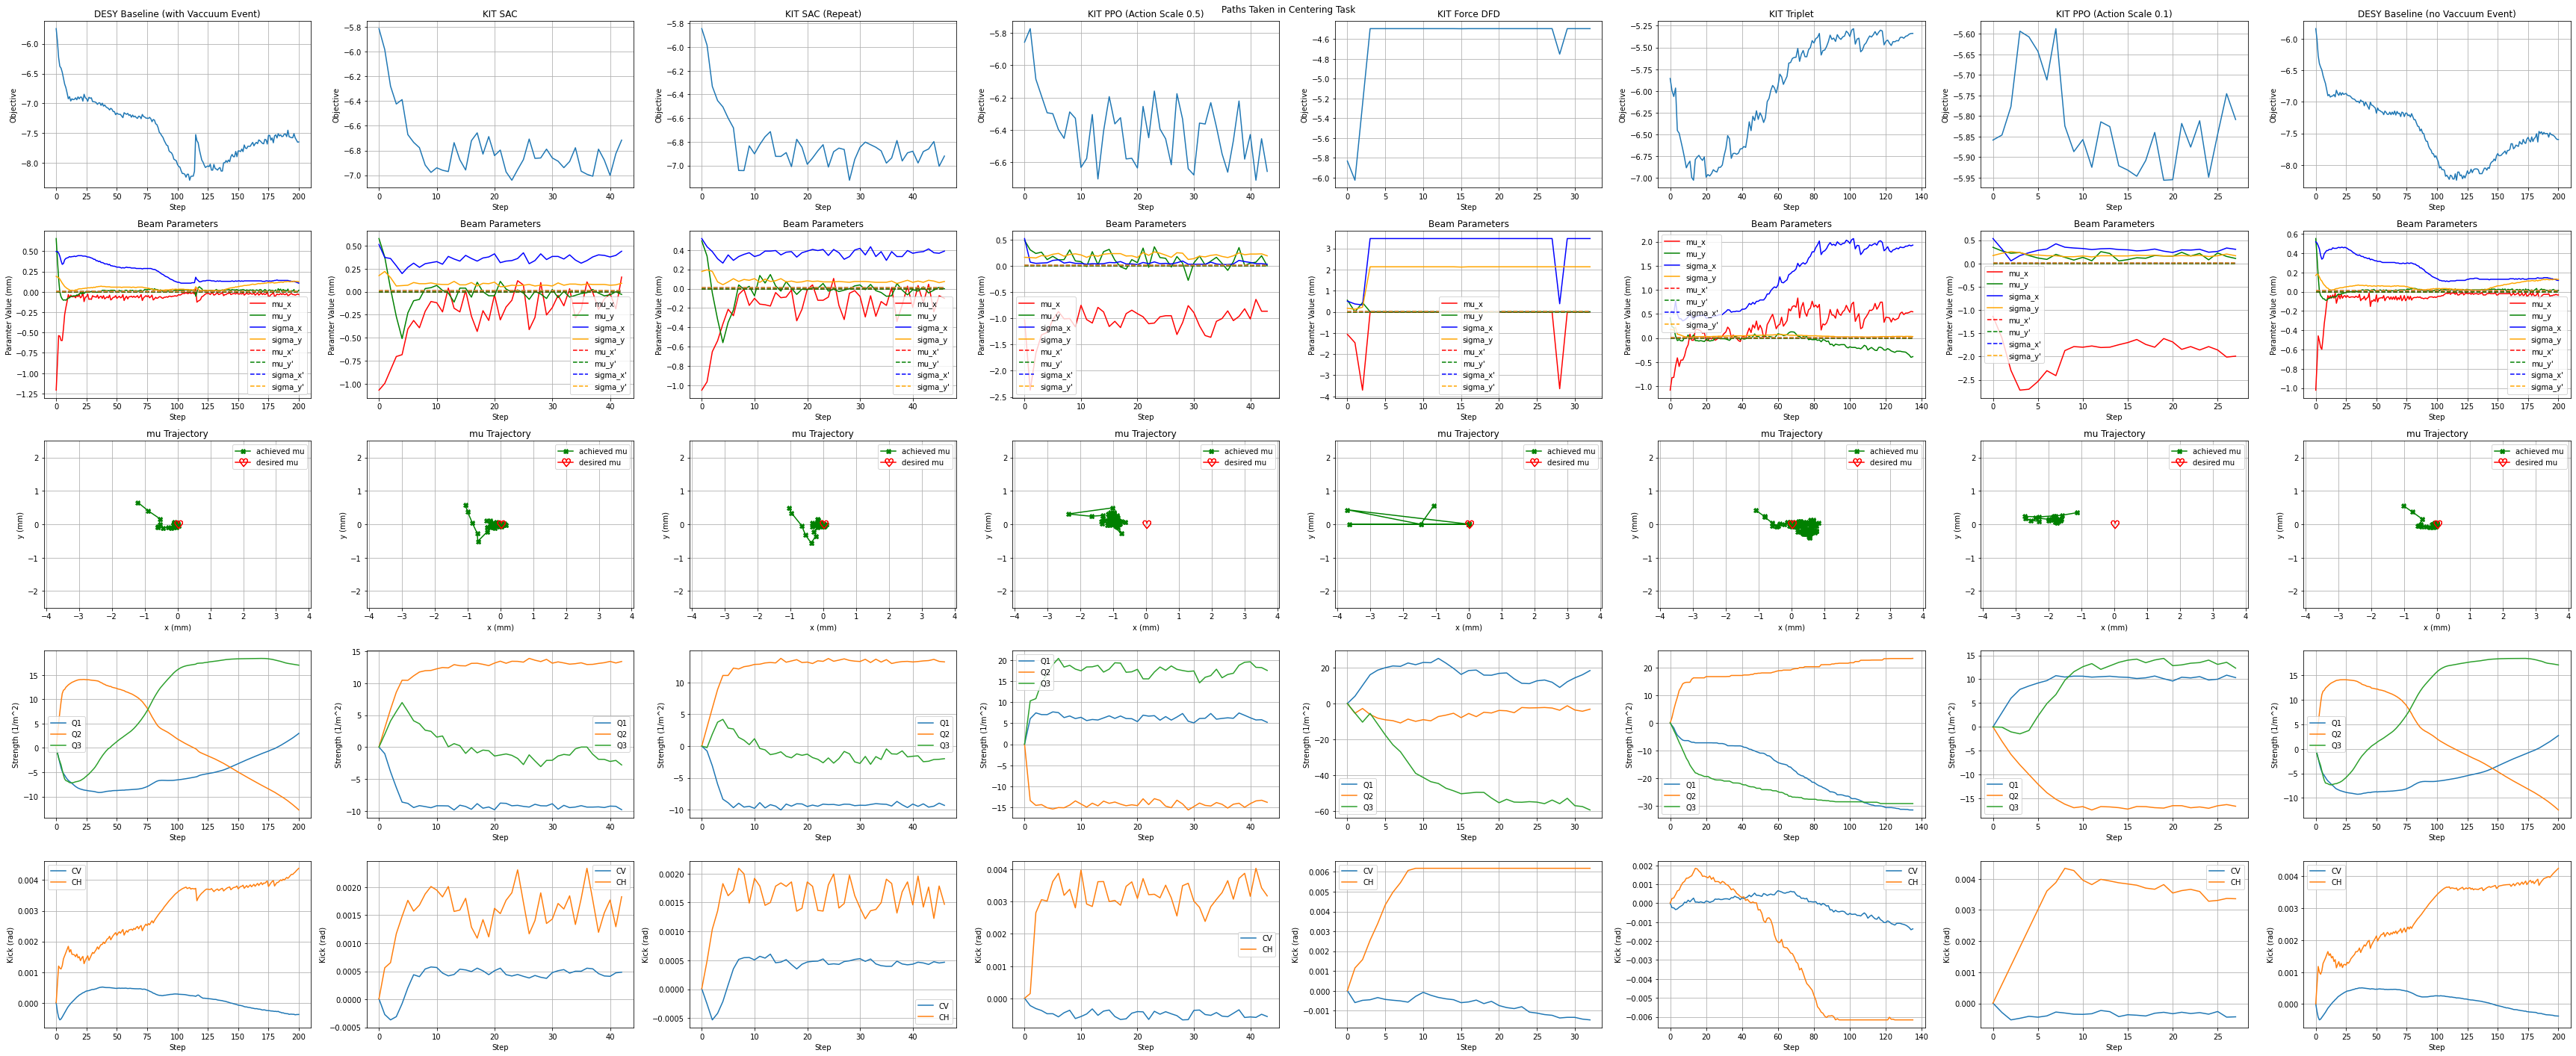

In [61]:
agents = paths[2:9] + paths[13:14]
names = [p.split("/")[1] for p in agents]

names[0] = "DESY Baseline (with Vaccuum Event)"
names[1] = "KIT SAC"
names[2] = "KIT SAC (Repeat)"
names[3] = "KIT PPO (Action Scale 0.5)"
names[4] = "KIT Force DFD"
names[5] = "KIT Triplet"
names[6] = "KIT PPO (Action Scale 0.1)"
names[7] = "DESY Baseline (no Vaccuum Event)"

plt.figure(figsize=(48,20))
plt.suptitle("Paths Taken in Centering Task")
for i, (agent, name) in enumerate(zip(agents, names)):
    with open(agent, "rb") as f:
        data = pickle.load(f)
    
    
    plt.subplot(5, len(names), i+1+0*len(agents))
    objective = [sample["objective"] for sample in data["history"]]
    plot_objective(objective)
    plt.title(name)
    
    achieveds = np.array([sample["observation"]["achieved_goal"] for sample in data["history"]])
    desireds = np.array([sample["observation"]["desired_goal"] for sample in data["history"]])
    plt.subplot(5, len(agents), i+1+1*len(agents))
    plot_beam_parameters(achieveds, desireds)
    plt.subplot(5, len(agents), i+1+2*len(agents))
    plot_trajectory(achieveds, desireds, (3.3198e-6,2.4469e-6), (2448,2040))
    
    actuators = np.array([sample["observation"]["observation"] for sample in data["history"]])
    plt.subplot(5, len(agents), i+1+3*len(agents))
    plot_quadrupoles(actuators)
    plt.subplot(5, len(agents), i+1+4*len(agents))
    plot_steerers(actuators)
plt.tight_layout()
plt.show()

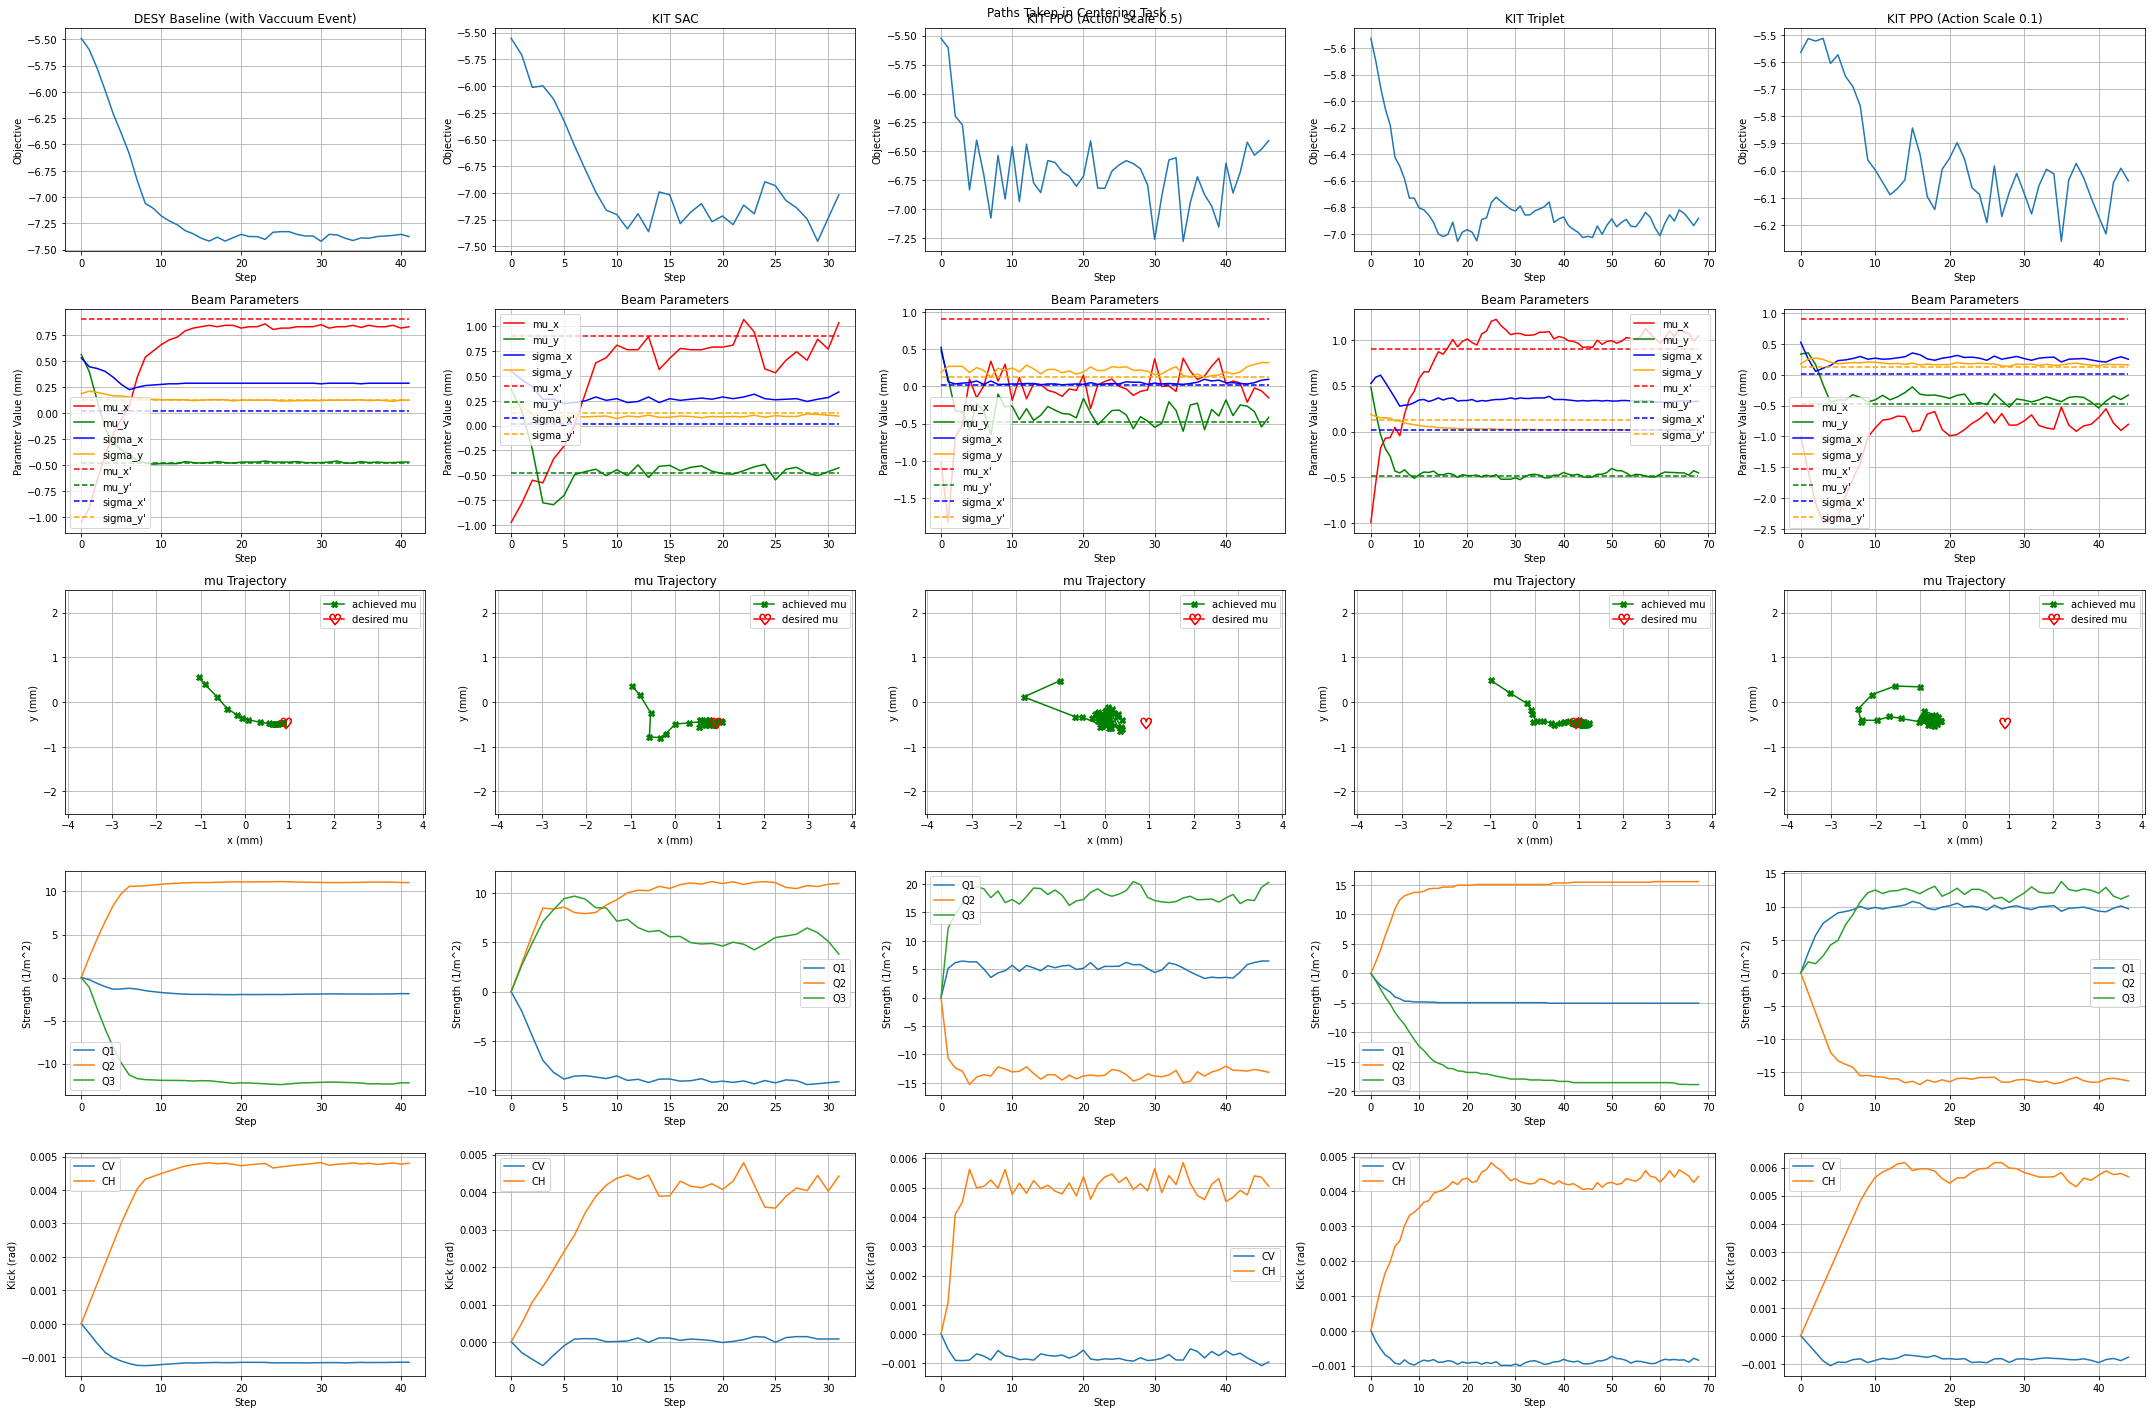

In [62]:
agents = paths[14:19]
names = [p.split("/")[1] for p in agents]

names[0] = "DESY Baseline (with Vaccuum Event)"
names[1] = "KIT SAC"
names[2] = "KIT PPO (Action Scale 0.5)"
names[3] = "KIT Triplet"
names[4] = "KIT PPO (Action Scale 0.1)"

plt.figure(figsize=(30,20))
plt.suptitle("Paths Taken in Centering Task")
for i, (agent, name) in enumerate(zip(agents, names)):
    with open(agent, "rb") as f:
        data = pickle.load(f)
    
    plt.subplot(5, len(names), i+1+0*len(agents))
    objective = [sample["objective"] for sample in data["history"]]
    plot_objective(objective)
    plt.title(name)
    
    achieveds = np.array([sample["observation"]["achieved_goal"] for sample in data["history"]])
    desireds = np.array([sample["observation"]["desired_goal"] for sample in data["history"]])
    plt.subplot(5, len(agents), i+1+1*len(agents))
    plot_beam_parameters(achieveds, desireds)
    plt.subplot(5, len(agents), i+1+2*len(agents))
    plot_trajectory(achieveds, desireds, (3.3198e-6,2.4469e-6), (2448,2040))
    
    actuators = np.array([sample["observation"]["observation"] for sample in data["history"]])
    plt.subplot(5, len(agents), i+1+3*len(agents))
    plot_quadrupoles(actuators)
    plt.subplot(5, len(agents), i+1+4*len(agents))
    plot_steerers(actuators)
plt.tight_layout()
plt.show()